#***Pre Steps***

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#required packages.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ***EX_1***
<ul>
<li>
<b>Perform PCA on given Dataset</b>
</li>
<li>
<b>Perfrom EDA on given Dataset</b>
</li>
</ul>

In [4]:
data1=pd.read_csv('/content/drive/MyDrive/sem 6/Lab/ML Lab/Lab 1/dataset_ex_1.csv',names=["Class name"
,'Left weight','Left distance','Right weight','Right distance'])
display(data1.head())

,Class name,Left weight,Left distance,Right weight,Right distance
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5


## ***PCA***

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [6]:
#Standardize everything.

x=data1.loc[:,['Left weight','Left distance','Right weight','Right distance']]
y=data1.loc[:,'Class name']
display(x.head())
display(y.head())

Standardized_x=StandardScaler().fit_transform(x)
display(Standardized_x)

,Left weight,Left distance,Right weight,Right distance
0,1,1,1,1
1,1,1,1,2
2,1,1,1,3
3,1,1,1,4
4,1,1,1,5


,Class name
0,B
1,R
2,R
3,R
4,R


array([[-1.41421356, -1.41421356, -1.41421356, -1.41421356],
       [-1.41421356, -1.41421356, -1.41421356, -0.70710678],
       [-1.41421356, -1.41421356, -1.41421356,  0.        ],
       ...,
       [ 1.41421356,  1.41421356,  1.41421356,  0.        ],
       [ 1.41421356,  1.41421356,  1.41421356,  0.70710678],
       [ 1.41421356,  1.41421356,  1.41421356,  1.41421356]])

In [7]:
#Applying PCA to reduce features from 4 to 2.

pca=PCA(n_components=2)#n_components denotes required no of components from PCA.
Standardized_pca=pca.fit_transform(Standardized_x)
display(Standardized_pca)

principal_data1=pd.DataFrame(Standardized_pca,columns=["pc1",'pc2'])
display(principal_data1.head())

final_data1=pd.concat([principal_data1,y],axis=1)
display(final_data1.head())

array([[-2.01392321, -1.05914461],
       [-1.36500608, -1.33984975],
       [-0.71608895, -1.62055489],
       ...,
       [ 0.71608895,  1.62055489],
       [ 1.36500608,  1.33984975],
       [ 2.01392321,  1.05914461]])

,pc1,pc2
0,-2.013923,-1.059145
1,-1.365006,-1.339850
2,-0.716089,-1.620555
3,-0.067172,-1.901260
4,0.581745,-2.181965


,pc1,pc2,Class name
0,-2.013923,-1.059145,B
1,-1.365006,-1.339850,R
2,-0.716089,-1.620555,R
3,-0.067172,-1.901260,R
4,0.581745,-2.181965,R


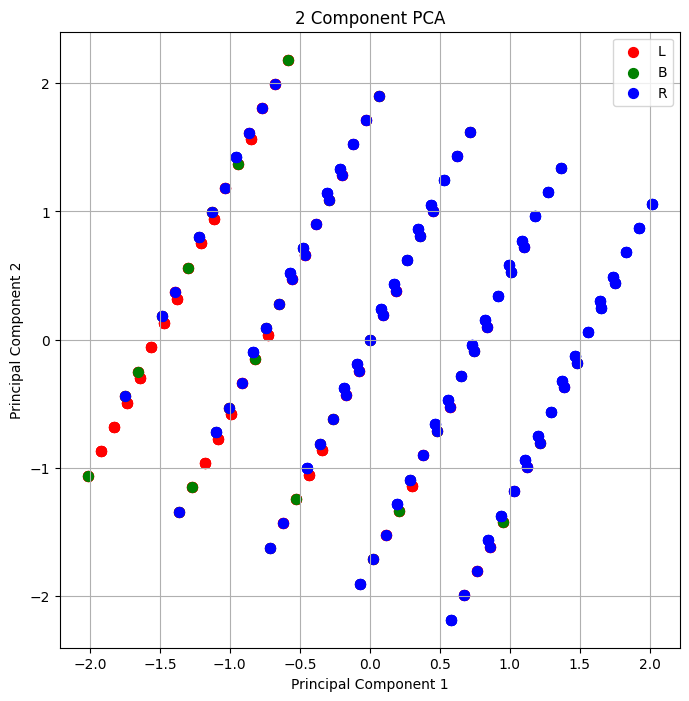

In [8]:
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(1,1,1)
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_title("2 Component PCA")

targets=['L',"B",'R']
colors=['r','g','b']

for target,color in zip(targets,colors):
    indices_to_be_kept= final_data1['Class name']==target
    ax.scatter(final_data1.loc[indices_to_be_kept,'pc1'],final_data1.loc[indices_to_be_kept,'pc2'],c=color,s=50)
ax.legend(targets)
ax.grid()

## ***EDA***

In [9]:
print('Shape of Dataset : ',data1.shape)

print("\n\nColumns in Dataset : ",data1.columns.values)

print("\n\nSUmmary Statistics : ")
display(data1.describe())

print("\n\nData Types in the Dataset : ")
display(data1.dtypes)

Shape of Dataset :  (625, 5)


Columns in Dataset :  ['Class name' 'Left weight' 'Left distance' 'Right weight'
 'Right distance']


SUmmary Statistics : 


,Left weight,Left distance,Right weight,Right distance
count,625.000000,625.000000,625.000000,625.000000
mean,3.000000,3.000000,3.000000,3.000000
std,1.415346,1.415346,1.415346,1.415346
min,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,2.000000,2.000000
50%,3.000000,3.000000,3.000000,3.000000
75%,4.000000,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000




Data Types in the Dataset : 


,0
Class name,object
Left weight,int64
Left distance,int64
Right weight,int64
Right distance,int64


In [10]:
#working with data types.

for col in data1.columns:
  try:
    data1[col]=pd.to_numeric(data1[col])
  except:
    pass

display(data1.head())
data1.info

,Class name,Left weight,Left distance,Right weight,Right distance
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5


<bound method DataFrame.info of     Class name  Left weight  Left distance  Right weight  Right distance
0            B            1              1             1               1
1            R            1              1             1               2
2            R            1              1             1               3
3            R            1              1             1               4
4            R            1              1             1               5
..         ...          ...            ...           ...             ...
620          L            5              5             5               1
621          L            5              5             5               2
622          L            5              5             5               3
623          L            5              5             5               4
624          B            5              5             5               5

[625 rows x 5 columns]>

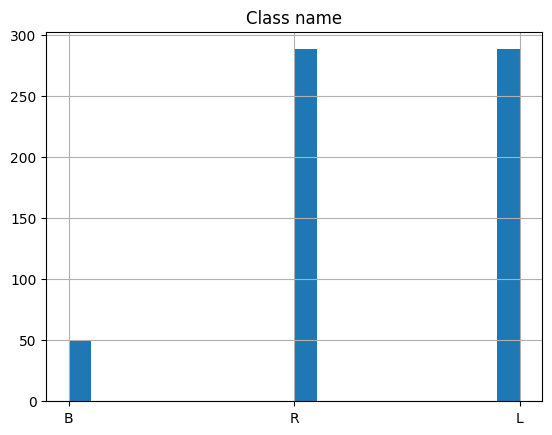

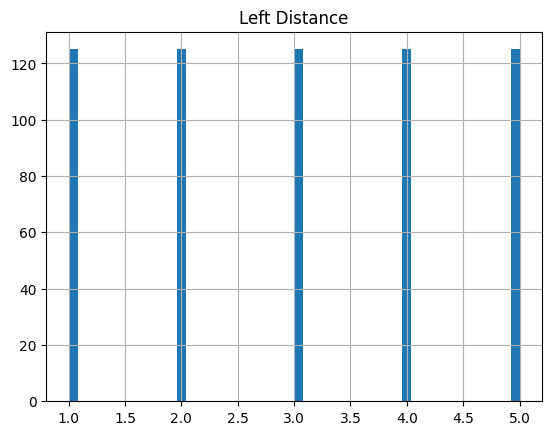

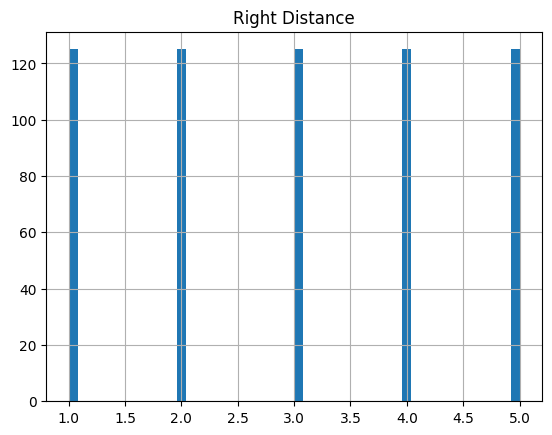

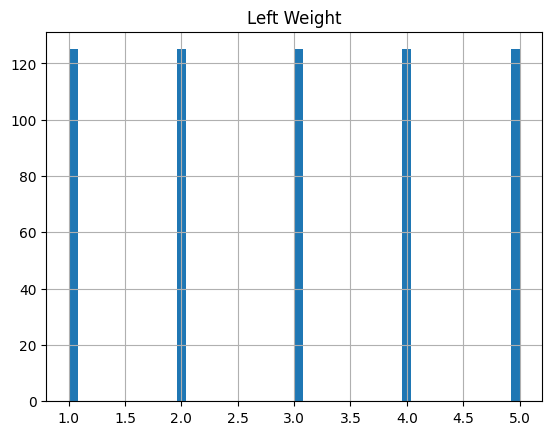

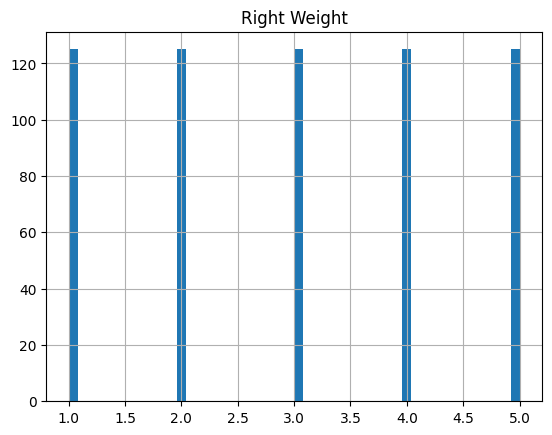

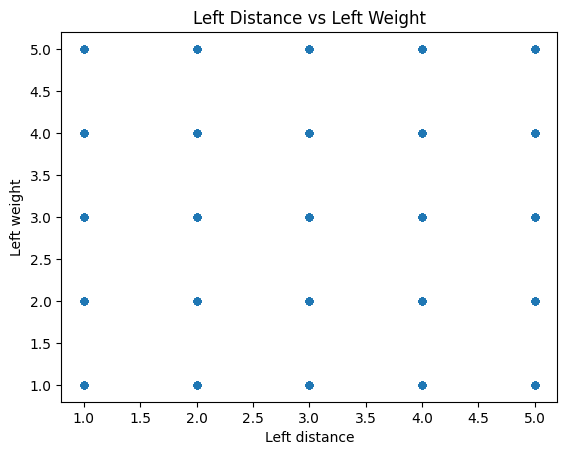

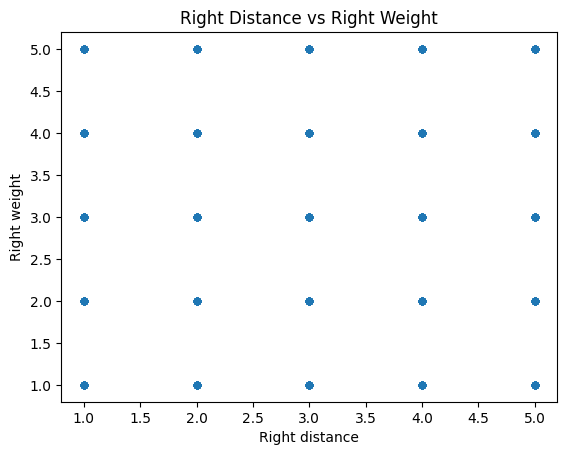

In [11]:
data1['Class name'].hist(bins=20)
plt.title('Class name')
plt.show()

data1['Left distance'].hist(bins=50)
plt.title('Left Distance')
plt.show()

data1['Right distance'].hist(bins=50)
plt.title('Right Distance')
plt.show()

data1['Left weight'].hist(bins=50)
plt.title('Left Weight')
plt.show()

data1['Right weight'].hist(bins=50)
plt.title('Right Weight')
plt.show()

data1.plot.scatter(x='Left distance',y='Left weight')
plt.title('Left Distance vs Left Weight')
plt.show()

data1.plot.scatter(x='Right distance',y='Right weight')
plt.title('Right Distance vs Right Weight')
plt.show()

# ***EX_2***

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report

In [13]:
data2=pd.read_csv('/content/drive/MyDrive/sem 6/Lab/ML Lab/Lab 2/dataset2.csv',names=['Class name','Left weight','Left distance','Right weight','Right distance'])
display(data2.head())

x=data2.loc[:,['Left weight','Left distance','Right weight','Right distance']]  #input features.
y=data2.loc[:,'Class name'] #output feature.

Standardized_x=StandardScaler().fit_transform(x)#statndardize the dataset.
display(Standardized_x)

X_train,X_test,y_train,y_test=train_test_split(Standardized_x,y,test_size=0.4,random_state=4)#split data for training and prediction.


,Class name,Left weight,Left distance,Right weight,Right distance
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5


array([[-1.41421356, -1.41421356, -1.41421356, -1.41421356],
       [-1.41421356, -1.41421356, -1.41421356, -0.70710678],
       [-1.41421356, -1.41421356, -1.41421356,  0.        ],
       ...,
       [ 1.41421356,  1.41421356,  1.41421356,  0.        ],
       [ 1.41421356,  1.41421356,  1.41421356,  0.70710678],
       [ 1.41421356,  1.41421356,  1.41421356,  1.41421356]])

In [14]:
# shape of each terms.

print("Shape of X_train : ",X_train.shape)
print("Shape of y_train : ",y_train.shape)
print("Shape of X_test : ",X_test.shape)
print("Shape of y_test : ",y_test.shape)

Shape of X_train :  (375, 4)
Shape of y_train :  (375,)
Shape of X_test :  (250, 4)
Shape of y_test :  (250,)


In [15]:
knn=KNeighborsClassifier(n_neighbors=15)  #n_neighbors indicates no of clusters to be formed.
knn.fit(X_train,y_train)  #training the knn model with training data.

y_pred=knn.predict(X_test)  #prediction using test data.
print(f"Accuracy Score : {accuracy_score(y_test,y_pred)}")  #comparing original output with predicted output.
print("\n\nClassification Report : \n",classification_report(y_test,y_pred,zero_division=0))  #classification report.

Accuracy Score : 0.904


Classification Report : 
               precision    recall  f1-score   support

           B       0.00      0.00      0.00        19
           L       0.91      0.97      0.94       113
           R       0.90      0.98      0.94       118

    accuracy                           0.90       250
   macro avg       0.60      0.65      0.63       250
weighted avg       0.84      0.90      0.87       250



# ***EX_3***

In [16]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [17]:
data3=pd.read_csv('/content/drive/MyDrive/sem 6/Lab/ML Lab/Lab 3/dataset.csv',names=['Class name','Left weight','Left distance','Right weight','Right distance'])
display(data3.head())

,Class name,Left weight,Left distance,Right weight,Right distance
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5


In [18]:
x=data3.loc[:,['Left weight','Left distance','Right weight','Right distance']]
y=data3.loc[:,'Class name']
lda=LDA(n_components=2)
lda_x=lda.fit(x,y).transform(x)

print(type(lda))
print(lda_x)

<class 'sklearn.discriminant_analysis.LinearDiscriminantAnalysis'>
[[ 1.33226763e-15 -2.82253092e+00]
 [ 6.20281290e-01 -2.46971455e+00]
 [ 1.24056258e+00 -2.11689819e+00]
 ...
 [-1.24056258e+00  2.11689819e+00]
 [-6.20281290e-01  2.46971455e+00]
 [-1.33226763e-15  2.82253092e+00]]


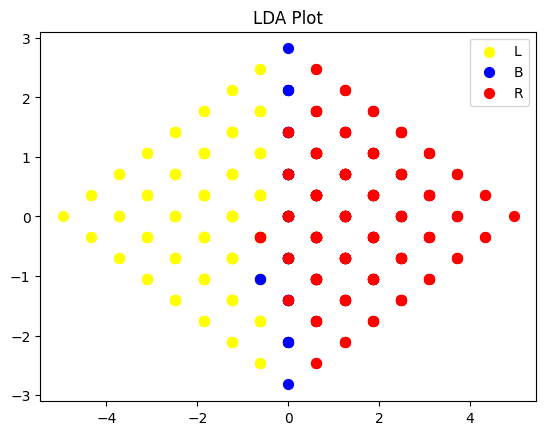

In [19]:
plt.scatter(lda_x[y=='L',0],lda_x[y=='L',1],color='yellow',s=50,label='L')
plt.scatter(lda_x[y=='B',0],lda_x[y=='B',1],color='blue',s=50,label="B")
plt.scatter(lda_x[y=='R',0],lda_x[y=='R',1],color='red',s=50,label="R")
plt.legend()
plt.title("LDA Plot")
plt.show()

# ***EX_4***

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,accuracy_score,classification_report

In [21]:
data4=pd.read_csv('/content/drive/MyDrive/sem 6/Lab/ML Lab/Lab 4/dataset4.csv')
display(data4.head())

,adviser,32/60,125,256,6000,256.1,16,128,198,199
0,amdahl,470v/7,29,8000,32000,32,8,32,269,253
1,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
2,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
3,amdahl,470v/7c,29,8000,16000,32,8,16,132,132
4,amdahl,470v/b,26,8000,32000,64,8,32,318,290


In [22]:
x=data4.iloc[:,3:4].values
y=data4.iloc[:,[8]].values
print(x.shape)
print(y.shape)

(208, 1)
(208, 1)


In [23]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(166, 1)
(166, 1)
(42, 1)
(42, 1)


In [24]:
lin_reg=LinearRegression()
lin_reg.fit(X_train,y_train)

y_pred=lin_reg.predict(X_test)
print(f"Model Score : ",lin_reg.score(X_test,y_test))
print(f"R2 Score : {r2_score(y_test,y_pred)}")

Model Score :  0.5173550372587894
R2 Score : 0.5173550372587894


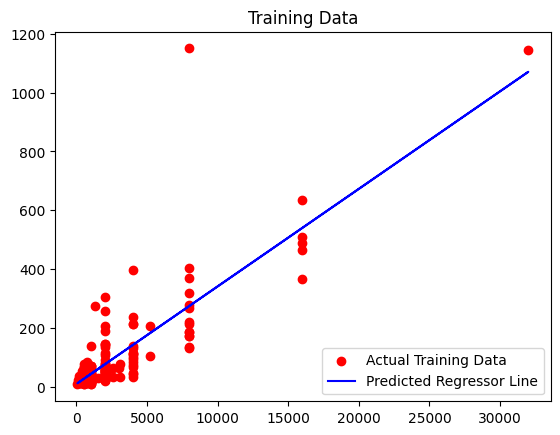

In [25]:
plt.scatter(X_train,y_train,color='red',label="Actual Training Data")
plt.plot(X_train,lin_reg.predict(X_train),color='blue',label="Predicted Regressor Line")
plt.title("Training Data")
plt.legend()
plt.show()

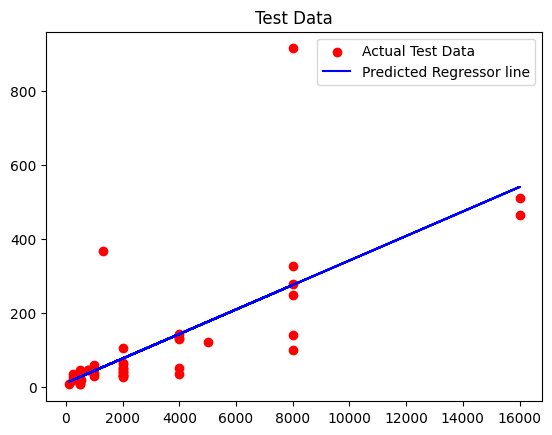

In [26]:
plt.scatter(X_test,y_test,color='r',label="Actual Test Data")
plt.plot(X_test,lin_reg.predict(X_test),color='b',label="Predicted Regressor line")
plt.title("Test Data")
plt.legend()
plt.show()

[[10.05263833]
 [10.11893137]
 [10.31781051]]


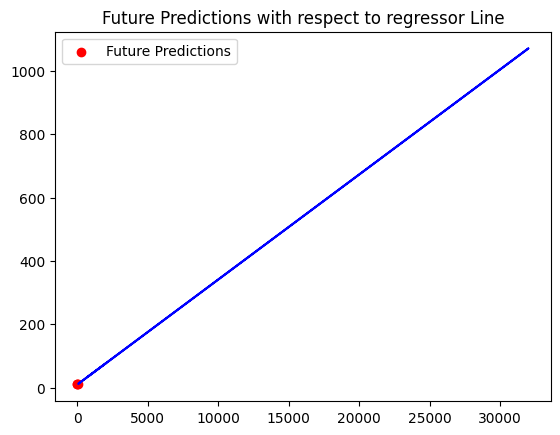

In [27]:
future_predictions=[[2],[4],[10]]
predicted_values=lin_reg.predict(future_predictions)
print(predicted_values)

plt.scatter(future_predictions,lin_reg.predict(future_predictions),color='r',label="Future Predictions")
plt.plot(X_train,lin_reg.predict(X_train),color='b')
plt.title("Future Predictions with respect to regressor Line")
plt.legend()
plt.show()

# ***EX_5***

In [1]:
from sklearn import datasets

In [ ]:
data=datasets.load_wine()
display(data)